In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
# Load the dataset
df = pd.read_csv("titanic_codsoft.csv")
print("Data loaded successfully!")

Data loaded successfully!


In [6]:
# Display basic info
print("\nInitial Data Overview:")
print(df.head())
print(df.info())


Initial Data Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

In [7]:
# Clean and Preprocess Data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

<ipython-input-7-ccda174b2bf6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-ccda174b2bf6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [9]:
# Encode Categorical Variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [10]:
# Drop unnecessary columns
df.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [11]:
# Features and Target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [13]:
# Build and Train the Model
model = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, n_estimators=150, random_state=42)

In [14]:
# Predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.7318435754189944

Confusion Matrix:
 [[90  9]
 [39 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79        99
           1       0.82      0.51      0.63        80

    accuracy                           0.73       179
   macro avg       0.76      0.71      0.71       179
weighted avg       0.75      0.73      0.72       179



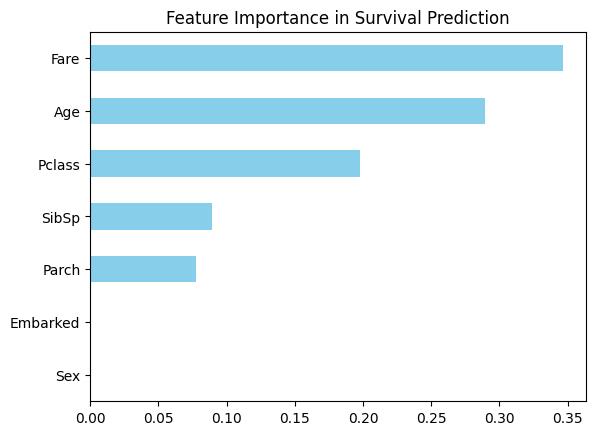

In [16]:
# Visualize Feature Importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance in Survival Prediction")
plt.show()